___

#### Rick Fontenot, Joe Lazarus, Puri Rudick
####
___


## This first section is a copy of the tensorflow tutorial to confirm setup, reference:
https://www.tensorflow.org/tutorials/keras/classification

Load the Tensorflow Library

In [342]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.8.0


Import the Fashion MNIST dataset

In [343]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Each image is mapped to a single label. Since the class names are not included with the dataset, store them here to use later when plotting the images:

In [344]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

In [345]:
train_images.shape


(60000, 28, 28)

Likewise, there are 60,000 labels in the training set:

In [346]:
len(train_labels)


60000

Each label is an integer between 0 and 9:

In [347]:
train_labels


array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

There are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels:

In [348]:
test_images.shape

(10000, 28, 28)

And the test set contains 10,000 images labels:

In [349]:
len(test_labels)

10000

## Preprocess the data
The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

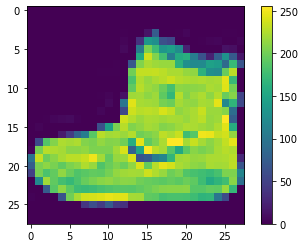

In [350]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the training set and the testing set be preprocessed in the same way:

In [351]:
train_images = train_images / 255.0

test_images = test_images / 255.0

To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the training set and display the class name below each image.

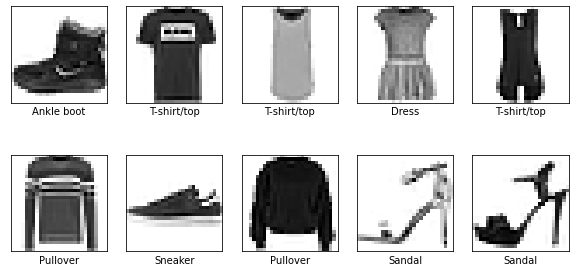

In [352]:
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Add Hierarchical class labels to the training and test sets 

In [353]:
import pandas as pd

train100_labels = pd.DataFrame(train_labels)
train100_labels = train100_labels.rename(columns={train100_labels.columns[0]: 'label'})

def replace_all(text, dic):
    for i, j in dic.items():
        text = text.replace(i, j)
    return text

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
               
d = { 0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}

train100_labels['fine_label'] = replace_all(train100_labels['label'], d)

train100_labels.head(20)

,label,fine_label
0,9,Ankle boot
1,0,T-shirt/top
2,0,T-shirt/top
3,3,Dress
4,0,T-shirt/top
5,2,Pullover
6,7,Sneaker
7,2,Pullover
8,5,Sandal
9,5,Sandal


In [354]:
medium_dictionary = {'T-shirt/top': 'Tops', 'Trouser': 'Bottoms', 'Pullover': 'Tops', 'Dress': 'Dresses', 'Coat': 'Outers', 'Sandal': 'Shoes', 'Shirt': 'Tops', 'Sneaker': 'Shoes', 'Bag': 'Accessories', 'Ankle boot': 'Shoes'}
train100_labels['medium_label']= train100_labels['fine_label'].map(medium_dictionary)

coarse_dictionary = {'Tops': 'Clothes', 'Bottoms': 'Clothes', 'Dresses': 'Clothes', 'Outers': 'Clothes', 'Shoes': 'Goods', 'Accessories': 'Goods'}
train100_labels['coarse_label']= train100_labels['medium_label'].map(coarse_dictionary)

train100_images_flattened = pd.DataFrame(train_images.flatten().reshape(60000, 784))

train100 = pd.concat([train100_labels, train100_images_flattened], axis=1)

train100.head()

,label,fine_label,medium_label,coarse_label,0,1,2,3,4,5,...,774,775,776,777,778,779,780,781,782,783
0,9,Ankle boot,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0,T-shirt/top,Tops,Clothes,0.0,0.0,0.0,0.0,0.0,0.003922,...,0.466667,0.447059,0.509804,0.298039,0.0,0.0,0.0,0.0,0.0,0.0
2,0,T-shirt/top,Tops,Clothes,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.003922,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,3,Dress,Dresses,Clothes,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0,T-shirt/top,Tops,Clothes,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [355]:
import pandas as pd

test_labels = pd.DataFrame(test_labels)
test_labels = test_labels.rename(columns={test_labels.columns[0]: 'label'})

test_labels['fine_label'] = replace_all(test_labels['label'], d)
test_labels['medium_label']= test_labels['fine_label'].map(medium_dictionary)
test_labels['coarse_label']= test_labels['medium_label'].map(coarse_dictionary)

test_images_flattened = pd.DataFrame(test_images.flatten().reshape(10000, 784))

test = pd.concat([test_labels, test_images_flattened], axis=1)

test.head(20)

,label,fine_label,medium_label,coarse_label,0,1,2,3,4,5,...,774,775,776,777,778,779,780,781,782,783
0,9,Ankle boot,Shoes,Goods,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
1,2,Pullover,Tops,Clothes,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.007843,0.011765,0.000000,0.011765,0.682353,0.741176,0.262745,0.000000,0.0,0.0
2,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.643137,0.227451,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
3,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.003922,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
4,6,Shirt,Tops,Clothes,0.0,0.0,0.0,0.007843,0.0,0.003922,...,0.278431,0.047059,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
5,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.568627,0.505882,0.243137,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
6,4,Coat,Outers,Clothes,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.141176,0.117647,0.105882,0.105882,0.000000,0.000000,0.0,0.0
7,6,Shirt,Tops,Clothes,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.039216,0.000000,0.000000,0.137255,0.329412,0.215686,0.000000,0.000000,0.0,0.0
8,5,Sandal,Shoes,Goods,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
9,7,Sneaker,Shoes,Goods,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0


## Stratified split of training set into 90% train, 10% validation
### Validation can be used for early stopping on models 3,4,5
### and for tuning on model 5
### Once stopping criteria and hyperparameters determined, re-fit with full training set before predictions

In [356]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=42)
for train_index, holdback_index in split.split(train100, train100.label):
    train90 = train100.iloc[train_index]
    validation10 = train100.iloc[holdback_index]


In [357]:
print("90% Training set \n",train90['fine_label'].value_counts())
print("10% Validation set \n",validation10['fine_label'].value_counts())



90% Training set 
 Bag            5400
Ankle boot     5400
T-shirt/top    5400
Trouser        5400
Coat           5400
Shirt          5400
Sandal         5400
Sneaker        5400
Dress          5400
Pullover       5400
Name: fine_label, dtype: int64
10% Validation set 
 Dress          600
Trouser        600
Ankle boot     600
Bag            600
Pullover       600
Coat           600
T-shirt/top    600
Shirt          600
Sandal         600
Sneaker        600
Name: fine_label, dtype: int64


In [358]:
train90_images_flattened = train90.iloc[:,4:784].values
validation10_images_flattened = validation10.iloc[:,4:784].values


Based on framework described above, the following training subsets need to be created:

train100_clothes --> subset train100.coarse_label == "Clothes" should have 36,000 rows
train100_goods --> subset train100.coarse_label == "Goods" should have 24,000 rows
train100_tops --> subset train100.medium_label == "Tops" should have 18,000 rows
train100_shoes --> subset train100.medium_label == "Shoes" should have 18,000 rows

** Note the 1st coarse model just uses the full training set, no subset needed

In [367]:
train100_clothes = train100[train100.coarse_label == "Clothes"]
print("Clothes # Rows = ",train100_clothes.shape[0])
train100_goods = train100[train100.coarse_label == "Goods"]
print("Goods # Rows = ",train100_goods.shape[0])
train100_tops = train100[train100.medium_label == "Tops"]
print("Tops # Rows = ",train100_tops.shape[0])
train100_shoes = train100[train100.medium_label == "Shoes"]
print("Shoes # Rows = ",train100_shoes.shape[0])

Clothes # Rows =  36000
Goods # Rows =  24000
Tops # Rows =  18000
Shoes # Rows =  18000


Create "X" with just the flattened image columns for each training set

In [368]:
train100_clothes_flattened = train100_clothes.iloc[:,4:784].values
train100_goods_flattened = train100_goods.iloc[:,4:784].values
train100_tops_flattened = train100_tops.iloc[:,4:784].values
train100_shoes_flattened = train100_shoes.iloc[:,4:784].values



## Model 4: HNN with early stopping for epochs

Coarse Level Model

In [455]:
model4_coarse = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2)
])

model4_coarse.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [456]:
coarse_ints = {'Clothes': 0, 'Goods': 1}

# Important note, the labels need to be of array type for tf or the training time increases significantly
model4_course_labels = np.asarray(train100['coarse_label'].map(coarse_ints))
#model4_course_val_labels = np.asarray(validation10['coarse_label'].map(coarse_ints))

In [457]:
from datetime import datetime

model4_coarse_start_time = datetime.now()
model4_coarse.fit(train100_images_flattened, model4_course_labels, validation_split=0.1, epochs=200, callbacks=[earlystop, tb])
model4_coarse__end_time = datetime.now()
model4_coarse__train_time = model4_coarse__end_time - model4_coarse_start_time
print("Model-4-Coarse Training Time = ",model4_coarse__train_time)

# validation_split=0.1
# validation_data=[validation10_images_flattened, model4_course_val_labels]

Epoch 1/200
   1/1688 [..............................] - ETA: 9:27 - loss: 0.6800 - accuracy: 0.5938

2022-05-18 18:58:27.388284: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1684/1688 [============================>.] - ETA: 0s - loss: 0.0397 - accuracy: 0.9891

2022-05-18 18:58:35.463677: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1688/1688 [==============================] - 9s 5ms/step - loss: 0.0396 - accuracy: 0.9892 - val_loss: 0.0247 - val_accuracy: 0.9928
Epoch 2/200
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0247 - accuracy: 0.9929 - val_loss: 0.0197 - val_accuracy: 0.9938
Epoch 3/200
1688/1688 [==============================] - 8s 4ms/step - loss: 0.0193 - accuracy: 0.9945 - val_loss: 0.0162 - val_accuracy: 0.9952
Epoch 4/200
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0158 - accuracy: 0.9952 - val_loss: 0.0168 - val_accuracy: 0.9952
Epoch 5/200
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0136 - accuracy: 0.9961 - val_loss: 0.0162 - val_accuracy: 0.9943
Epoch 6/200
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0117 - accuracy: 0.9966 - val_loss: 0.0181 - val_accuracy: 0.9942
Epoch 7/200
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0107 - accuracy: 0.9968 - val_loss: 0.0180 - val_accuracy: 0.9

Clothes Model

In [458]:
clothes_ints = {'Tops': 0, 'Dresses': 1, 'Bottoms': 2, 'Outers': 3}

# Important note, the labels need to be of array type for tf or the training time increases significantly
model4_clothes_labels = np.asarray(train100_clothes['medium_label'].map(clothes_ints))

In [459]:
model4_clothes = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(4)
])

model4_clothes.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [460]:
from datetime import datetime

model4_clothes_start_time = datetime.now()
model4_clothes.fit(train100_clothes_flattened, model4_clothes_labels, validation_split=0.1, epochs=200, callbacks=[earlystop, tb])
model4_clothes_end_time = datetime.now()
model4_clothes_train_time = model4_clothes_end_time - model4_clothes_start_time
print("Model-4-Clothes Training Time = ",model4_clothes_train_time)

Epoch 1/200
   1/1013 [..............................] - ETA: 5:46 - loss: 1.3058 - accuracy: 0.5000

2022-05-18 19:00:57.741781: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1013/1013 [==============================] - ETA: 0s - loss: 0.3667 - accuracy: 0.8578

2022-05-18 19:01:03.133554: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1013/1013 [==============================] - 6s 6ms/step - loss: 0.3667 - accuracy: 0.8578 - val_loss: 0.3047 - val_accuracy: 0.8867
Epoch 2/200
1013/1013 [==============================] - 5s 5ms/step - loss: 0.2881 - accuracy: 0.8899 - val_loss: 0.3221 - val_accuracy: 0.8669
Epoch 3/200
1013/1013 [==============================] - 6s 6ms/step - loss: 0.2646 - accuracy: 0.8976 - val_loss: 0.2998 - val_accuracy: 0.8694
Epoch 4/200
1013/1013 [==============================] - 5s 5ms/step - loss: 0.2487 - accuracy: 0.9054 - val_loss: 0.3177 - val_accuracy: 0.8783
Epoch 5/200
1013/1013 [==============================] - 5s 5ms/step - loss: 0.2347 - accuracy: 0.9095 - val_loss: 0.2480 - val_accuracy: 0.9050
Epoch 6/200
1013/1013 [==============================] - 5s 5ms/step - loss: 0.2249 - accuracy: 0.9148 - val_loss: 0.2447 - val_accuracy: 0.9064
Epoch 7/200
1013/1013 [==============================] - 5s 5ms/step - loss: 0.2150 - accuracy: 0.9190 - val_loss: 0.2548 - val_accuracy: 0.90

Goods Model

In [461]:
goods_ints = {'Shoes': 0, 'Accessories': 1}

# Important note, the labels need to be of array type for tf or the training time increases significantly
model4_goods_labels = np.asarray(train100_goods['medium_label'].map(goods_ints))

In [462]:
model4_goods = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2)
])

model4_goods.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [463]:
from datetime import datetime

model4_goods_start_time = datetime.now()
model4_goods.fit(train100_goods_flattened, model4_goods_labels, validation_split=0.1, epochs=200, callbacks=[earlystop, tb])
model4_goods_end_time = datetime.now()
model4_goods_train_time = model4_goods_end_time - model4_goods_start_time
print("Model-4-Goods Training Time = ",model4_goods_train_time)

Epoch 1/200
 11/675 [..............................] - ETA: 3s - loss: 0.3207 - accuracy: 0.9006  

2022-05-18 19:03:06.553431: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


669/675 [============================>.] - ETA: 0s - loss: 0.0260 - accuracy: 0.9933

2022-05-18 19:03:09.241481: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


675/675 [==============================] - 3s 4ms/step - loss: 0.0257 - accuracy: 0.9933 - val_loss: 0.0228 - val_accuracy: 0.9925
Epoch 2/200
675/675 [==============================] - 3s 5ms/step - loss: 0.0113 - accuracy: 0.9964 - val_loss: 0.0146 - val_accuracy: 0.9946
Epoch 3/200
675/675 [==============================] - 3s 4ms/step - loss: 0.0071 - accuracy: 0.9979 - val_loss: 0.0137 - val_accuracy: 0.9954
Epoch 4/200
675/675 [==============================] - 3s 4ms/step - loss: 0.0054 - accuracy: 0.9984 - val_loss: 0.0162 - val_accuracy: 0.9950
Epoch 5/200
675/675 [==============================] - 3s 4ms/step - loss: 0.0050 - accuracy: 0.9984 - val_loss: 0.0148 - val_accuracy: 0.9954
Epoch 6/200
675/675 [==============================] - 3s 4ms/step - loss: 0.0020 - accuracy: 0.9993 - val_loss: 0.0168 - val_accuracy: 0.9958
Epoch 7/200
675/675 [==============================] - 3s 4ms/step - loss: 0.0015 - accuracy: 0.9996 - val_loss: 0.0170 - val_accuracy: 0.9954
Epoch 8/200

Tops Model

In [464]:
tops_ints = {'T-shirt/top': 0, 'Pullover': 1, 'Shirt': 2}

# Important note, the labels need to be of array type for tf or the training time increases significantly
model4_tops_labels = np.asarray(train100_tops['fine_label'].map(tops_ints))

In [465]:
model4_tops = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3)
])

model4_tops.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [466]:
from datetime import datetime

model4_tops_start_time = datetime.now()
model4_tops.fit(train100_tops_flattened, model4_tops_labels,  validation_split=0.1, epochs=200, callbacks=[earlystop, tb])
model4_tops_end_time = datetime.now()
model4_tops_train_time = model4_tops_end_time - model4_tops_start_time
print("Model-2-Tops Training Time = ",model4_tops_train_time)

Epoch 1/200
  1/507 [..............................] - ETA: 2:44 - loss: 1.2627 - accuracy: 0.2500

2022-05-18 19:04:04.059999: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


507/507 [==============================] - ETA: 0s - loss: 0.5359 - accuracy: 0.7796

2022-05-18 19:04:07.211452: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


507/507 [==============================] - 4s 6ms/step - loss: 0.5359 - accuracy: 0.7796 - val_loss: 0.4569 - val_accuracy: 0.8083
Epoch 2/200
507/507 [==============================] - 2s 5ms/step - loss: 0.4478 - accuracy: 0.8143 - val_loss: 0.4252 - val_accuracy: 0.8261
Epoch 3/200
507/507 [==============================] - 2s 5ms/step - loss: 0.4109 - accuracy: 0.8281 - val_loss: 0.4671 - val_accuracy: 0.8122
Epoch 4/200
507/507 [==============================] - 3s 5ms/step - loss: 0.3884 - accuracy: 0.8357 - val_loss: 0.4153 - val_accuracy: 0.8256
Epoch 5/200
507/507 [==============================] - 2s 5ms/step - loss: 0.3707 - accuracy: 0.8449 - val_loss: 0.3915 - val_accuracy: 0.8239
Epoch 6/200
507/507 [==============================] - 3s 5ms/step - loss: 0.3643 - accuracy: 0.8444 - val_loss: 0.3684 - val_accuracy: 0.8472
Epoch 7/200
507/507 [==============================] - 2s 5ms/step - loss: 0.3473 - accuracy: 0.8541 - val_loss: 0.3776 - val_accuracy: 0.8344
Epoch 8/200

Shoes Model

In [467]:
shoes_ints = {'Ankle boot': 0, 'Sneaker': 1, 'Sandal': 2}

# Important note, the labels need to be of array type for tf or the training time increases significantly
model4_shoes_labels = np.asarray(train100_shoes['fine_label'].map(shoes_ints))

In [468]:
model4_shoes = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3)
])

model4_shoes.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [469]:
from datetime import datetime

model4_shoes_start_time = datetime.now()
model4_shoes.fit(train100_shoes_flattened, model4_shoes_labels, validation_split=0.1, epochs=200, callbacks=[earlystop, tb])
model4_shoes_end_time = datetime.now()
model4_shoes_train_time = model4_shoes_end_time - model4_shoes_start_time
print("Model-2-Shoes Training Time = ",model4_shoes_train_time)

Epoch 1/200
  1/507 [..............................] - ETA: 2:33 - loss: 1.5114 - accuracy: 0.2188

2022-05-18 19:05:06.938682: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


504/507 [============================>.] - ETA: 0s - loss: 0.2590 - accuracy: 0.9070

2022-05-18 19:05:09.379149: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


507/507 [==============================] - 3s 5ms/step - loss: 0.2589 - accuracy: 0.9070 - val_loss: 0.1627 - val_accuracy: 0.9406
Epoch 2/200
507/507 [==============================] - 3s 5ms/step - loss: 0.1550 - accuracy: 0.9454 - val_loss: 0.1483 - val_accuracy: 0.9472
Epoch 3/200
507/507 [==============================] - 3s 5ms/step - loss: 0.1272 - accuracy: 0.9557 - val_loss: 0.1516 - val_accuracy: 0.9489
Epoch 4/200
507/507 [==============================] - 2s 5ms/step - loss: 0.1150 - accuracy: 0.9587 - val_loss: 0.1521 - val_accuracy: 0.9422
Epoch 5/200
507/507 [==============================] - 2s 5ms/step - loss: 0.1020 - accuracy: 0.9644 - val_loss: 0.1602 - val_accuracy: 0.9433
Epoch 6/200
507/507 [==============================] - 2s 5ms/step - loss: 0.0937 - accuracy: 0.9657 - val_loss: 0.1447 - val_accuracy: 0.9544
Epoch 7/200
507/507 [==============================] - 2s 5ms/step - loss: 0.0845 - accuracy: 0.9696 - val_loss: 0.1353 - val_accuracy: 0.9539
Epoch 8/200

## Make Predictions using pipeline of Model 4 subnetworks

**To recap the model output dictionaries are:** <br>
coarse_ints = {'Clothes': 0, 'Goods': 1} <br>
clothes_ints = {'Tops': 0, 'Dresses': 1, 'Bottoms': 2, 'Outers': 3} <br>
goods_ints = {'Shoes': 0, 'Accessories': 1} <br>
tops_ints = {'T-shirt/top': 0, 'Pullover': 1, 'Shirt': 2} <br>
shoes_ints = {'Ankle boot': 0, 'Sneaker': 1, 'Sandal': 2} <br>

coarse predictions

In [470]:
del test_clothes_other4
del test_tops4
del test_goods_other4
del test_shoes4

In [471]:

test4 = test.iloc[:,0:788].copy()
test_images_flattened4 = test_images_flattened
test4

,label,fine_label,medium_label,coarse_label,0,1,2,3,4,5,...,774,775,776,777,778,779,780,781,782,783
0,9,Ankle boot,Shoes,Goods,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
1,2,Pullover,Tops,Clothes,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.007843,0.011765,0.0,0.011765,0.682353,0.741176,0.262745,0.0,0.0,0.0
2,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.643137,0.227451,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
3,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.003922,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
4,6,Shirt,Tops,Clothes,0.0,0.0,0.0,0.007843,0.0,0.003922,...,0.278431,0.047059,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9,Ankle boot,Shoes,Goods,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
9996,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
9997,8,Bag,Accessories,Goods,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.105882,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
9998,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0


In [472]:
model4_coarse_probbability_model = tf.keras.Sequential([model4_coarse, tf.keras.layers.Softmax()])
model4_coarse_predictions = model4_coarse_probbability_model.predict(test_images_flattened4)
model4_coarse_prediction_label = np.argmax(model4_coarse_predictions, axis=1)

2022-05-18 19:05:53.002050: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [473]:
import pandas as pd

model4_coarse_prediction_labels = pd.DataFrame(model4_coarse_prediction_label)
model4_coarse_prediction_labels = model4_coarse_prediction_labels.rename(columns={model4_coarse_prediction_labels.columns[0]: 'model4_coarse_prediction'})

coarse_mapping = {0: 'Clothes', 1: 'Goods'}
model4_coarse_prediction_labels['model4_coarse_prediction']= model4_coarse_prediction_labels['model4_coarse_prediction'].map(coarse_mapping)

model4_coarse_prediction_labels.head(10)

,model4_coarse_prediction
0,Goods
1,Clothes
2,Clothes
3,Clothes
4,Clothes
5,Clothes
6,Clothes
7,Clothes
8,Goods
9,Goods


In [474]:
test4 = pd.concat([test4, model4_coarse_prediction_labels], axis=1)
test4.head()

,label,fine_label,medium_label,coarse_label,0,1,2,3,4,5,...,775,776,777,778,779,780,781,782,783,model4_coarse_prediction
0,9,Ankle boot,Shoes,Goods,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Goods
1,2,Pullover,Tops,Clothes,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.011765,0.0,0.011765,0.682353,0.741176,0.262745,0.0,0.0,0.0,Clothes
2,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.227451,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Clothes
3,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Clothes
4,6,Shirt,Tops,Clothes,0.0,0.0,0.0,0.007843,0.0,0.003922,...,0.047059,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Clothes


### Split test set into Clothes vs. Goods to feed into next level of model predictions

In [475]:
test_clothes4 = test4[test4.model4_coarse_prediction == "Clothes"]
test_clothes_flattened4 = test_clothes4.iloc[:,4:784].values
test_clothes4.head()

,label,fine_label,medium_label,coarse_label,0,1,2,3,4,5,...,775,776,777,778,779,780,781,782,783,model4_coarse_prediction
1,2,Pullover,Tops,Clothes,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.011765,0.000000,0.011765,0.682353,0.741176,0.262745,0.0,0.0,0.0,Clothes
2,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.227451,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Clothes
3,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Clothes
4,6,Shirt,Tops,Clothes,0.0,0.0,0.0,0.007843,0.0,0.003922,...,0.047059,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Clothes
5,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.505882,0.243137,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Clothes


In [476]:
test_goods4 = test4[test4.model4_coarse_prediction == "Goods"]
test_goods_flattened4 = test_goods4.iloc[:,4:784].values
test_goods4.head()

,label,fine_label,medium_label,coarse_label,0,1,2,3,4,5,...,775,776,777,778,779,780,781,782,783,model4_coarse_prediction
0,9,Ankle boot,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Goods
8,5,Sandal,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Goods
9,7,Sneaker,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Goods
11,5,Sandal,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Goods
12,7,Sneaker,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Goods


### Make predictions with Clothes sub-model

In [477]:
model4_clothes_probbability_model = tf.keras.Sequential([model4_clothes, tf.keras.layers.Softmax()])
model4_clothes_predictions = model4_clothes_probbability_model.predict(test_clothes_flattened4)
model4_clothes_prediction_label = np.argmax(model4_clothes_predictions, axis=1)

2022-05-18 19:05:53.762203: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [478]:
import pandas as pd

model4_clothes_prediction_labels = pd.DataFrame(model4_clothes_prediction_label)
model4_clothes_prediction_labels = model4_clothes_prediction_labels.rename(columns={model4_clothes_prediction_labels.columns[0]: 'model4_medium_prediction'})

clothes_mapping = {0: 'Tops', 1: 'Dresses', 2: 'Bottoms', 3: 'Outers'}
model4_clothes_prediction_labels['model4_medium_prediction']= model4_clothes_prediction_labels['model4_medium_prediction'].map(clothes_mapping)

model4_clothes_prediction_labels.head(10)

,model4_medium_prediction
0,Tops
1,Bottoms
2,Bottoms
3,Tops
4,Bottoms
5,Outers
6,Tops
7,Outers
8,Dresses
9,Outers


In [479]:
print(test_clothes4.shape)
test_clothes4

(6007, 789)


,label,fine_label,medium_label,coarse_label,0,1,2,3,4,5,...,775,776,777,778,779,780,781,782,783,model4_coarse_prediction
1,2,Pullover,Tops,Clothes,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.011765,0.000000,0.011765,0.682353,0.741176,0.262745,0.0,0.0,0.0,Clothes
2,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.227451,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Clothes
3,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Clothes
4,6,Shirt,Tops,Clothes,0.0,0.0,0.0,0.007843,0.0,0.003922,...,0.047059,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Clothes
5,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.505882,0.243137,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Clothes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,4,Coat,Outers,Clothes,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.525490,0.560784,0.180392,0.000000,0.0,0.0,0.0,Clothes
9991,6,Shirt,Tops,Clothes,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Clothes
9994,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Clothes
9996,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Clothes


In [480]:
print(model4_clothes_prediction_labels.shape)
model4_clothes_prediction_labels

(6007, 1)


,model4_medium_prediction
0,Tops
1,Bottoms
2,Bottoms
3,Tops
4,Bottoms
...,...
6002,Tops
6003,Tops
6004,Bottoms
6005,Bottoms


### Merge Clothes predictions back to test_clothes dataframe

In [481]:
test_clothes4.reset_index(drop=True, inplace=True)
model4_clothes_prediction_labels.reset_index(drop=True, inplace=True)
test_clothes4 = pd.concat([test_clothes4, model4_clothes_prediction_labels], axis=1)
test_clothes4.tail()

,label,fine_label,medium_label,coarse_label,0,1,2,3,4,5,...,776,777,778,779,780,781,782,783,model4_coarse_prediction,model4_medium_prediction
6002,4,Coat,Outers,Clothes,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.52549,0.560784,0.180392,0.0,0.0,0.0,0.0,Clothes,Tops
6003,6,Shirt,Tops,Clothes,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,Clothes,Tops
6004,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,Clothes,Bottoms
6005,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,Clothes,Bottoms
6006,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,Clothes,Bottoms


## Split Test Clothes into Tops for further modeling vs. others that just need fine label added

In [482]:
test_clothes_other4 = test_clothes4[test_clothes4.model4_medium_prediction != "Tops"]
test_clothes_other4.head()

,label,fine_label,medium_label,coarse_label,0,1,2,3,4,5,...,776,777,778,779,780,781,782,783,model4_coarse_prediction,model4_medium_prediction
1,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Clothes,Bottoms
2,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Clothes,Bottoms
4,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.0,0.0,0.0,...,0.243137,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Clothes,Bottoms
5,4,Coat,Outers,Clothes,0.0,0.0,0.0,0.0,0.0,0.0,...,0.141176,0.117647,0.105882,0.105882,0.000000,0.0,0.0,0.0,Clothes,Outers
7,4,Coat,Outers,Clothes,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.113725,0.568627,0.537255,0.231373,0.0,0.0,0.0,Clothes,Outers


### The others, have completed predictions, add fine labels to dataframe
Recap from Above:
If model2_clothes = Bottoms then model2.fine_label = Trouser
If model2_clothes = Dresses then model2.fine_label = Dress
If model2_clothes = Outers then model2.fine_label = Coat

In [483]:
test_clothes_other4['model4_fine_prediction'] = ''
test_clothes_other4.head()

/var/folders/9j/md1p5ld92510j4f_fk49qf300000gn/T/ipykernel_99294/3410850626.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_clothes_other4['model4_fine_prediction'] = ''


,label,fine_label,medium_label,coarse_label,0,1,2,3,4,5,...,777,778,779,780,781,782,783,model4_coarse_prediction,model4_medium_prediction,model4_fine_prediction
1,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Clothes,Bottoms,
2,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Clothes,Bottoms,
4,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Clothes,Bottoms,
5,4,Coat,Outers,Clothes,0.0,0.0,0.0,0.0,0.0,0.0,...,0.117647,0.105882,0.105882,0.000000,0.0,0.0,0.0,Clothes,Outers,
7,4,Coat,Outers,Clothes,0.0,0.0,0.0,0.0,0.0,0.0,...,0.113725,0.568627,0.537255,0.231373,0.0,0.0,0.0,Clothes,Outers,


In [484]:
clothes_other_mapping = {'Bottoms': 'Trouser', 'Dresses': 'Dress', 'Outers': 'Coat'}
test_clothes_other4['model4_fine_prediction']= test_clothes_other4['model4_medium_prediction'].map(clothes_other_mapping)
test_clothes_other4

/var/folders/9j/md1p5ld92510j4f_fk49qf300000gn/T/ipykernel_99294/2468961634.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_clothes_other4['model4_fine_prediction']= test_clothes_other4['model4_medium_prediction'].map(clothes_other_mapping)


,label,fine_label,medium_label,coarse_label,0,1,2,3,4,5,...,777,778,779,780,781,782,783,model4_coarse_prediction,model4_medium_prediction,model4_fine_prediction
1,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Clothes,Bottoms,Trouser
2,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Clothes,Bottoms,Trouser
4,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Clothes,Bottoms,Trouser
5,4,Coat,Outers,Clothes,0.0,0.0,0.0,0.0,0.0,0.0,...,0.117647,0.105882,0.105882,0.000000,0.0,0.0,0.0,Clothes,Outers,Coat
7,4,Coat,Outers,Clothes,0.0,0.0,0.0,0.0,0.0,0.0,...,0.113725,0.568627,0.537255,0.231373,0.0,0.0,0.0,Clothes,Outers,Coat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5999,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Clothes,Bottoms,Trouser
6000,3,Dress,Dresses,Clothes,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Clothes,Dresses,Dress
6004,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Clothes,Bottoms,Trouser
6005,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Clothes,Bottoms,Trouser


### Split test tops for next layer of modeling

In [485]:
test_tops4 = test_clothes4[test_clothes4.model4_medium_prediction == "Tops"]
test_tops_flattened4 = test_tops4.iloc[:,4:784].values
test_tops4.head()

,label,fine_label,medium_label,coarse_label,0,1,2,3,4,5,...,776,777,778,779,780,781,782,783,model4_coarse_prediction,model4_medium_prediction
0,2,Pullover,Tops,Clothes,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.011765,0.682353,0.741176,0.262745,0.000000,0.0,0.0,Clothes,Tops
3,6,Shirt,Tops,Clothes,0.0,0.0,0.0,0.007843,0.0,0.003922,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,Clothes,Tops
6,6,Shirt,Tops,Clothes,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.137255,0.329412,0.215686,0.000000,0.000000,0.0,0.0,Clothes,Tops
11,2,Pullover,Tops,Clothes,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.058824,0.478431,0.443137,0.317647,0.0,0.0,Clothes,Tops
12,4,Coat,Outers,Clothes,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,Clothes,Tops


## Make predictions with the Tops sub-model

In [486]:
model4_tops_probbability_model = tf.keras.Sequential([model4_tops, tf.keras.layers.Softmax()])
model4_tops_predictions = model4_tops_probbability_model.predict(test_tops_flattened4)
model4_tops_prediction_label = np.argmax(model4_tops_predictions, axis=1)

2022-05-18 19:05:54.847240: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [487]:
import pandas as pd

model4_tops_prediction_labels = pd.DataFrame(model4_tops_prediction_label)
model4_tops_prediction_labels = model4_tops_prediction_labels.rename(columns={model4_tops_prediction_labels.columns[0]: 'model4_fine_prediction'})

tops_mapping = {0: 'T-shirt/top', 1: 'Pullover', 2: 'Shirt'}
model4_tops_prediction_labels['model4_fine_prediction']= model4_tops_prediction_labels['model4_fine_prediction'].map(tops_mapping)

model4_tops_prediction_labels.head(10)

,model4_fine_prediction
0,Pullover
1,Shirt
2,Shirt
3,Pullover
4,Pullover
5,T-shirt/top
6,Pullover
7,Pullover
8,Shirt
9,T-shirt/top


In [488]:
test_tops4.reset_index(drop=True, inplace=True)
model4_tops_prediction_labels.reset_index(drop=True, inplace=True)
test_tops4 = pd.concat([test_tops4, model4_tops_prediction_labels], axis=1)
test_tops4.tail()

,label,fine_label,medium_label,coarse_label,0,1,2,3,4,5,...,777,778,779,780,781,782,783,model4_coarse_prediction,model4_medium_prediction,model4_fine_prediction
3015,0,T-shirt/top,Tops,Clothes,0.0,0.0,0.0,0.0,0.0,0.011765,...,0.000000,0.000000,0.011765,0.0,0.0,0.0,0.0,Clothes,Tops,T-shirt/top
3016,0,T-shirt/top,Tops,Clothes,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.317647,0.000000,0.000000,0.0,0.0,0.0,0.0,Clothes,Tops,T-shirt/top
3017,2,Pullover,Tops,Clothes,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.003922,0.0,0.0,0.0,0.0,Clothes,Tops,Pullover
3018,4,Coat,Outers,Clothes,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.525490,0.560784,0.180392,0.0,0.0,0.0,0.0,Clothes,Tops,Pullover
3019,6,Shirt,Tops,Clothes,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,Clothes,Tops,Pullover


### The Clothes branch of the network is now complete
### Start the Goods branch of the network

In [489]:
model4_goods_probbability_model = tf.keras.Sequential([model4_goods, tf.keras.layers.Softmax()])
model4_goods_predictions = model4_goods_probbability_model.predict(test_goods_flattened4)
model4_goods_prediction_label = np.argmax(model4_goods_predictions, axis=1)

2022-05-18 19:05:55.320771: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [490]:
import pandas as pd

model4_goods_prediction_labels = pd.DataFrame(model4_goods_prediction_label)
model4_goods_prediction_labels = model4_goods_prediction_labels.rename(columns={model4_goods_prediction_labels.columns[0]: 'model4_medium_prediction'})

goods_mapping = {0: 'Shoes', 1: 'Accessories'}
model4_goods_prediction_labels['model4_medium_prediction']= model4_goods_prediction_labels['model4_medium_prediction'].map(goods_mapping)

model4_goods_prediction_labels.head(10)

,model4_medium_prediction
0,Shoes
1,Shoes
2,Shoes
3,Shoes
4,Shoes
5,Accessories
6,Shoes
7,Shoes
8,Shoes
9,Shoes


In [491]:
test_goods4

,label,fine_label,medium_label,coarse_label,0,1,2,3,4,5,...,775,776,777,778,779,780,781,782,783,model4_coarse_prediction
0,9,Ankle boot,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,Goods
8,5,Sandal,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,Goods
9,7,Sneaker,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,Goods
11,5,Sandal,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,Goods
12,7,Sneaker,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,Goods
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,8,Bag,Accessories,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.066667,0.0,0.035294,0.0,0.0,0.0,0.0,0.0,0.0,Goods
9993,9,Ankle boot,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,Goods
9995,9,Ankle boot,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,Goods
9997,8,Bag,Accessories,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,Goods


In [492]:
test_goods4.reset_index(drop=True, inplace=True)
model4_goods_prediction_labels.reset_index(drop=True, inplace=True)
test_goods4 = pd.concat([test_goods4, model4_goods_prediction_labels], axis=1)
test_goods4.tail()

,label,fine_label,medium_label,coarse_label,0,1,2,3,4,5,...,776,777,778,779,780,781,782,783,model4_coarse_prediction,model4_medium_prediction
3988,8,Bag,Accessories,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.035294,0.0,0.0,0.0,0.0,0.0,0.0,Goods,Accessories
3989,9,Ankle boot,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,Goods,Shoes
3990,9,Ankle boot,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,Goods,Shoes
3991,8,Bag,Accessories,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,Goods,Accessories
3992,5,Sandal,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,Goods,Shoes


## Split Test Goods into Shoes for further modeling vs. Accessories that just need fine label added

In [493]:
test_goods_other4 = test_goods4[test_goods4.model4_medium_prediction != "Shoes"]
test_goods_other4.tail()

,label,fine_label,medium_label,coarse_label,0,1,2,3,4,5,...,776,777,778,779,780,781,782,783,model4_coarse_prediction,model4_medium_prediction
3980,8,Bag,Accessories,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,Goods,Accessories
3983,8,Bag,Accessories,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,Goods,Accessories
3986,8,Bag,Accessories,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,Goods,Accessories
3988,8,Bag,Accessories,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.035294,0.0,0.0,0.0,0.0,0.0,0.0,Goods,Accessories
3991,8,Bag,Accessories,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,Goods,Accessories


In [494]:
test_goods_other4['model4_fine_prediction'] = ''
test_goods_other4.head()

/var/folders/9j/md1p5ld92510j4f_fk49qf300000gn/T/ipykernel_99294/1691373491.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_goods_other4['model4_fine_prediction'] = ''


,label,fine_label,medium_label,coarse_label,0,1,2,3,4,5,...,777,778,779,780,781,782,783,model4_coarse_prediction,model4_medium_prediction,model4_fine_prediction
5,8,Bag,Accessories,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Goods,Accessories,
10,8,Bag,Accessories,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Goods,Accessories,
11,8,Bag,Accessories,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.015686,0.000000,0.0,0.0,0.0,Goods,Accessories,
12,8,Bag,Accessories,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.713725,0.658824,0.000000,0.000000,0.0,0.0,0.0,Goods,Accessories,
20,8,Bag,Accessories,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.043137,0.0,0.0,0.0,Goods,Accessories,


In [495]:
goods_other_mapping = {'Accessories': 'Bag'}
test_goods_other4['model4_fine_prediction']= test_goods_other4['model4_medium_prediction'].map(goods_other_mapping)
test_goods_other4.tail()

/var/folders/9j/md1p5ld92510j4f_fk49qf300000gn/T/ipykernel_99294/539409896.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_goods_other4['model4_fine_prediction']= test_goods_other4['model4_medium_prediction'].map(goods_other_mapping)


,label,fine_label,medium_label,coarse_label,0,1,2,3,4,5,...,777,778,779,780,781,782,783,model4_coarse_prediction,model4_medium_prediction,model4_fine_prediction
3980,8,Bag,Accessories,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,Goods,Accessories,Bag
3983,8,Bag,Accessories,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,Goods,Accessories,Bag
3986,8,Bag,Accessories,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,Goods,Accessories,Bag
3988,8,Bag,Accessories,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.035294,0.0,0.0,0.0,0.0,0.0,0.0,Goods,Accessories,Bag
3991,8,Bag,Accessories,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,Goods,Accessories,Bag


## Make predictions with Shoes model

In [496]:
test_shoes4 = test_goods4[test_goods4.model4_medium_prediction == "Shoes"]
test_shoes_flattened4 = test_shoes4.iloc[:,4:784].values
test_shoes4.head()

,label,fine_label,medium_label,coarse_label,0,1,2,3,4,5,...,776,777,778,779,780,781,782,783,model4_coarse_prediction,model4_medium_prediction
0,9,Ankle boot,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Goods,Shoes
1,5,Sandal,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Goods,Shoes
2,7,Sneaker,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Goods,Shoes
3,5,Sandal,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Goods,Shoes
4,7,Sneaker,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Goods,Shoes


In [497]:
model4_shoes_probbability_model = tf.keras.Sequential([model4_shoes, tf.keras.layers.Softmax()])
model4_shoes_predictions = model4_shoes_probbability_model.predict(test_shoes_flattened4)
model4_shoes_prediction_label = np.argmax(model4_shoes_predictions, axis=1)

2022-05-18 19:05:56.174965: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [498]:
import pandas as pd

model4_shoes_prediction_labels = pd.DataFrame(model4_shoes_prediction_label)
model4_shoes_prediction_labels = model4_shoes_prediction_labels.rename(columns={model4_shoes_prediction_labels.columns[0]: 'model4_fine_prediction'})

shoes_mapping = {0: 'Ankle boot', 1: 'Sneaker', 2: 'Sandal'}
model4_shoes_prediction_labels['model4_fine_prediction']= model4_shoes_prediction_labels['model4_fine_prediction'].map(shoes_mapping)

model4_shoes_prediction_labels.head(10)

,model4_fine_prediction
0,Ankle boot
1,Sandal
2,Sneaker
3,Sandal
4,Sandal
5,Sandal
6,Sneaker
7,Sandal
8,Ankle boot
9,Sneaker


In [499]:
test_shoes4.reset_index(drop=True, inplace=True)
model4_shoes_prediction_labels.reset_index(drop=True, inplace=True)
test_shoes4 = pd.concat([test_shoes4, model4_shoes_prediction_labels], axis=1)
test_shoes4.tail()

,label,fine_label,medium_label,coarse_label,0,1,2,3,4,5,...,777,778,779,780,781,782,783,model4_coarse_prediction,model4_medium_prediction,model4_fine_prediction
3001,5,Sandal,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,Goods,Shoes,Sandal
3002,5,Sandal,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.015686,0.0,0.313725,0.301961,0.0,0.0,0.0,Goods,Shoes,Sandal
3003,9,Ankle boot,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,Goods,Shoes,Ankle boot
3004,9,Ankle boot,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,Goods,Shoes,Ankle boot
3005,5,Sandal,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,Goods,Shoes,Sandal


In [500]:
model4_all_predictions = pd.concat([test_clothes_other4, test_tops4, test_goods_other4, test_shoes4])
model4_all_predictions.shape

(10000, 791)

In [501]:
model4_all_predictions.isna().sum()

label                       0
fine_label                  0
medium_label                0
coarse_label                0
0                           0
                           ..
782                         0
783                         0
model4_coarse_prediction    0
model4_medium_prediction    0
model4_fine_prediction      0
Length: 791, dtype: int64

In [502]:
test_shoes4

,label,fine_label,medium_label,coarse_label,0,1,2,3,4,5,...,777,778,779,780,781,782,783,model4_coarse_prediction,model4_medium_prediction,model4_fine_prediction
0,9,Ankle boot,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,Goods,Shoes,Ankle boot
1,5,Sandal,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,Goods,Shoes,Sandal
2,7,Sneaker,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,Goods,Shoes,Sneaker
3,5,Sandal,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,Goods,Shoes,Sandal
4,7,Sneaker,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,Goods,Shoes,Sandal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3001,5,Sandal,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,Goods,Shoes,Sandal
3002,5,Sandal,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.015686,0.0,0.313725,0.301961,0.0,0.0,0.0,Goods,Shoes,Sandal
3003,9,Ankle boot,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,Goods,Shoes,Ankle boot
3004,9,Ankle boot,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,Goods,Shoes,Ankle boot


In [503]:
model4_all_predictions.head()

,label,fine_label,medium_label,coarse_label,0,1,2,3,4,5,...,777,778,779,780,781,782,783,model4_coarse_prediction,model4_medium_prediction,model4_fine_prediction
1,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Clothes,Bottoms,Trouser
2,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Clothes,Bottoms,Trouser
4,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Clothes,Bottoms,Trouser
5,4,Coat,Outers,Clothes,0.0,0.0,0.0,0.0,0.0,0.0,...,0.117647,0.105882,0.105882,0.000000,0.0,0.0,0.0,Clothes,Outers,Coat
7,4,Coat,Outers,Clothes,0.0,0.0,0.0,0.0,0.0,0.0,...,0.113725,0.568627,0.537255,0.231373,0.0,0.0,0.0,Clothes,Outers,Coat


In [504]:
model4_all_predictions.model4_fine_prediction

1          Trouser
2          Trouser
4          Trouser
5             Coat
7             Coat
           ...    
3001        Sandal
3002        Sandal
3003    Ankle boot
3004    Ankle boot
3005        Sandal
Name: model4_fine_prediction, Length: 10000, dtype: object

In [505]:
model4_fine_accuracy = accuracy_score(model4_all_predictions.fine_label, model4_all_predictions.model4_fine_prediction)
model4_medium_accuracy = accuracy_score(model4_all_predictions.medium_label, model4_all_predictions.model4_medium_prediction)
model4_coarse_accuracy = accuracy_score(model4_all_predictions.coarse_label, model4_all_predictions.model4_coarse_prediction)



In [506]:
model4_train_time = model4_coarse__train_time + model4_clothes_train_time + model4_goods_train_time + model4_tops_train_time + model4_shoes_train_time
summary.loc[len(summary.index)] = ["4-HNN", round(model4_train_time.total_seconds()), model4_coarse_accuracy*100, model4_medium_accuracy*100, model4_fine_accuracy*100]
summary

,Model,Train Time,Coarse Acc,Medium Acc,Fine Acc
0,1-Flat,88,99.59,93.80,88.88
1,2-HNN,197,99.47,93.80,88.20
2,3-Flat,153,99.42,93.54,87.52
3,4-HNN,444,99.45,94.09,88.80


In [507]:
print("Fine Level Classification Report \n",classification_report(model4_all_predictions.fine_label,model4_all_predictions.model4_fine_prediction))
print("\n")
print("Medium Level Classification Report \n",classification_report(model4_all_predictions.medium_label,model4_all_predictions.model4_medium_prediction))
print("\n")
print("Coarse Level Classification Report \n",classification_report(model4_all_predictions.coarse_label,model4_all_predictions.model4_coarse_prediction))

Fine Level Classification Report 
               precision    recall  f1-score   support

  Ankle boot       0.94      0.97      0.96      1000
         Bag       0.98      0.96      0.97      1000
        Coat       0.80      0.81      0.81      1000
       Dress       0.91      0.88      0.89      1000
    Pullover       0.79      0.80      0.80      1000
      Sandal       0.97      0.95      0.96      1000
       Shirt       0.73      0.71      0.72      1000
     Sneaker       0.95      0.95      0.95      1000
 T-shirt/top       0.82      0.85      0.84      1000
     Trouser       0.98      0.98      0.98      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



Medium Level Classification Report 
               precision    recall  f1-score   support

 Accessories       0.98      0.96      0.97      1000
     Bottoms       0.98      0.98      0.98      1000
    